In [4]:
import pandas as pd
import numpy as np
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf

In [15]:
df = pd.read_csv("../labeling/Combined_Labels_3Tiers.csv",header=0, encoding='utf-8') #need the encoding to correctly display emojis
df = df.drop(columns=['num_comments', 'selftext', 'score', 'new_id', 'author', 'fulltext_processed'])

In [16]:
df

,post id,Manual Sentiment,Manual Main Ticker,Unnamed: 3,id,title,Time of Creation,fulltext,ticker
0,22223,Buy,CLOV,NaN,parw0m,My first YOLO - jumped on $CLOV wagon! LFGoooo...,44432.47543,My first YOLO - jumped on $CLOV wagon! LFGoooo...,CLOV
1,3537,Buy,TSLA,NaN,hlyyut,Tesla is undervalued at $1200.,44017.83737,Tesla is undervalued at $1200. I bought my fir...,TSLA
2,7256,Buy,GME,NaN,kxzrp5,"New GME Bulls, come have a chat. Let me spin y...",44211.45264,"New GME Bulls, come have a chat. Let me spin y...",GME
3,13155,Buy,GME,NaN,lb02kr,Porn addict hasnƒ??t masturbated in 54 days an...,44229.40501,Porn addict hasnƒ??t masturbated in 54 days an...,GME
4,5425,Buy,PLTR,NaN,k3im9p,We are all in this b*tch tmr right? PLTR to th...,44164.63639,We are all in this b*tch tmr right? PLTR to th...,PLTR
...,...,...,...,...,...,...,...,...,...
1394,13646,Sell,AMD,NaN,ob9mjg,Should I sell or hold? Up 50% already on 2023 ...,44377.74236,Should I sell or hold? Up 50% already on 2023 ...,AMD
1395,9552,Buy,GME,NaN,ltcdf5,FINRA data now shows over 67 million GME short...,44253.74444,FINRA data now shows over 67 million GME short...,GME
1396,17745,Hold,AMD,NaN,yipaj2,How will AMD close following their Earnings Re...,44865.63889,How will AMD close following their Earnings Re...,AMD
1397,9554,Hold,GME,NaN,ltagot,WHY THE SQUEEZE HAS NOT BEEN SQUOZE,44253.67431,WHY THE SQUEEZE HAS NOT BEEN SQUOZE BEAR WITH ...,GME


In [18]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Calgary123\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Calgary123\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Calgary123\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Calgary123\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [19]:
import string
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
additional_stopwords = ['http', 'amp', 'https']

for word in additional_stopwords:
    stopwords.add(word)

tickers = ['aapl', 'tsla', 'amd', 'msft', 'tlry', 'amzn', 'bb', 'nio', 'gme', 'bbby',
           'nok', 'spce', 'amc', 'rkt', 'crsr', 'pltr', 'clov', 'wish', 'uwmc', 'clne']

from nltk.tokenize import word_tokenize
from emoji import is_emoji
from emoji import demojize

In [20]:
# Based on Dr. Uddin's A1 Solution
regex = re.compile('[^a-zA-Z]')

# Use regex to remove non-alpha characters
def removeNonAlpha(word):
    return regex.sub('', word)
 
# Remove any special characters
def remove_specialchars(word):
    if word is None or word == "":
        return word
    exclude = set(string.punctuation)    
    exclude.add('..')
    exclude.add('*')
    for c in exclude:
        word = word.strip(c)
    return word

def preprocessText(text_input):
    
    # Replace emojis in string with words
    text_input = demojize(text_input, delimiters=(" ", "emoji "))
    
    # Replace other symbols
    text_input = text_input.replace('+', ' plussign ')
    text_input = text_input.replace('-', ' minussign ')
    text_input = text_input.replace('%', ' percentsign ')
    text_input = text_input.replace('$', ' dollarsign ')
    
    words = []
                   
    # Tokenize into sentences, then into words
    sents = nltk.sent_tokenize(text_input)
    for sent in sents:
        for word in nltk.word_tokenize(sent):
            
            word = word.lower()
            
            # Remove stop words, specials chars, non-alpha
            word = remove_specialchars(word)
            
            try:
                float(word.replace(',' , ""))
                word = "numberplaceholder"
            except:
                pass
                
            word = removeNonAlpha(word)
            
            if word in stopwords: continue
            
            # Remove words with length shorter than 3 characters
            if len(word) < 3 and word not in tickers: continue
                          
            # Lemmatize the word
            word = WordNetLemmatizer().lemmatize(word)
            
            if word is not None:
                words.append(word)
                
        
    # Return the preprocessed text
    return " ".join(words)

In [21]:
df['processed_text'] = df['fulltext'].apply(preprocessText)
df

,post id,Manual Sentiment,Manual Main Ticker,Unnamed: 3,id,title,Time of Creation,fulltext,ticker,processed_text
0,22223,Buy,CLOV,NaN,parw0m,My first YOLO - jumped on $CLOV wagon! LFGoooo...,44432.47543,My first YOLO - jumped on $CLOV wagon! LFGoooo...,CLOV,first yolo minussign jumped dollarsign clov wa...
1,3537,Buy,TSLA,NaN,hlyyut,Tesla is undervalued at $1200.,44017.83737,Tesla is undervalued at $1200. I bought my fir...,TSLA,tesla undervalued dollarsign numberplaceholder...
2,7256,Buy,GME,NaN,kxzrp5,"New GME Bulls, come have a chat. Let me spin y...",44211.45264,"New GME Bulls, come have a chat. Let me spin y...",GME,new gme bull come chat let spin yarn warning a...
3,13155,Buy,GME,NaN,lb02kr,Porn addict hasnƒ??t masturbated in 54 days an...,44229.40501,Porn addict hasnƒ??t masturbated in 54 days an...,GME,porn addict masturbated numberplaceholder day ...
4,5425,Buy,PLTR,NaN,k3im9p,We are all in this b*tch tmr right? PLTR to th...,44164.63639,We are all in this b*tch tmr right? PLTR to th...,PLTR,tch tmr right pltr moon numberplaceholder ment...
...,...,...,...,...,...,...,...,...,...,...
1394,13646,Sell,AMD,NaN,ob9mjg,Should I sell or hold? Up 50% already on 2023 ...,44377.74236,Should I sell or hold? Up 50% already on 2023 ...,AMD,sell hold numberplaceholder percentsign alread...
1395,9552,Buy,GME,NaN,ltcdf5,FINRA data now shows over 67 million GME short...,44253.74444,FINRA data now shows over 67 million GME short...,GME,finra data show numberplaceholder million gme ...
1396,17745,Hold,AMD,NaN,yipaj2,How will AMD close following their Earnings Re...,44865.63889,How will AMD close following their Earnings Re...,AMD,amd close following earnings report november n...
1397,9554,Hold,GME,NaN,ltagot,WHY THE SQUEEZE HAS NOT BEEN SQUOZE,44253.67431,WHY THE SQUEEZE HAS NOT BEEN SQUOZE BEAR WITH ...,GME,squeeze squoze bear ape gonne long one technic...


In [23]:
word_freq = pd.DataFrame(df.processed_text.str.split(expand=True).stack().value_counts(), columns=["mentions"])
word_freq[:20]

,mentions
numberplaceholder,5130
minussign,4972
dollarsign,2069
gme,1392
percentsign,1163
share,1059
stock,895
short,867
price,778
market,528


In [31]:
df_dateticker = df[['Time of Creation', 'ticker']]
df_dateticker['Time of Creation'] = pd.to_datetime(df_dateticker['Time of Creation'])
df_dateticker['Time of Creation'] = df_dateticker['Time of Creation'].dt.normalize()

C:\Users\Calgary123\AppData\Local\Temp\ipykernel_16984\2189014319.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dateticker['Time of Creation'] = pd.to_datetime(df_dateticker['Time of Creation'])
C:\Users\Calgary123\AppData\Local\Temp\ipykernel_16984\2189014319.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dateticker['Time of Creation'] = df_dateticker['Time of Creation'].dt.normalize()


In [25]:
def posts_vs_stock_graph(ticker):
    date_df = pd.DataFrame(pd.date_range(start = '2019-01-01', end = '2022-11-14'), columns = ['Date'])
    
    ticker_df = df_dateticker[df_dateticker['ticker']==ticker].groupby("Time of Creation").count()
    ticker_df = date_df.merge(ticker_df, left_on = 'Date', right_on = 'Time of Creation', how = 'outer').fillna(0)
    
    # Get the stock price
    start_date = '2019-01-01'
    end_date = '2022-11-14'
    df_stockprice = yf.download(ticker, start_date, end_date)
    
    
    ticker_df = ticker_df.merge(df_stockprice['Close'], left_on = 'Date', right_index = True, how = 'outer')
    
    ticker_df = ticker_df.fillna(method = 'ffill')
    ticker_df = ticker_df.fillna(method = 'bfill')
    
    ticker_df['year_month'] = pd.to_datetime(ticker_df['Date']).dt.to_period('M')
    ticker_df = ticker_df.groupby('year_month').agg({'ticker':'sum', 'Close': 'mean'}).reset_index()
    
    ticker_df = ticker_df.rename(columns={"year_month": "Date", "ticker": "Posts", "Close": "Stock Price"})
    
    # creating axes object and defining plot
    ax1 = ticker_df.plot(x = 'Date',
                      y = 'Posts')

    ax2 = ticker_df.plot(x = 'Date',
                       y = "Stock Price", secondary_y = True,
                       ax = ax1,
                        mark_right = False)

    #title of the plot
    plt.title("WSB Posts vs. Stock Price for " + ticker)

    #labeling x and y-axis
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Number of Posts per Month')
    ax2.set_ylabel('Stock Price (USD)')

    #defining display layout
    plt.tight_layout()

    #show plot
    plt.show()

In [26]:
top5 = ['AMC', 'BB', 'BBBY', 'GME', 'TSLA']
for ticker in top5:
    posts_vs_stock_graph(ticker)

[*********************100%***********************]  1 of 1 completed


ValueError: You are trying to merge on object and datetime64[ns] columns. If you wish to proceed you should use pd.concat

## Visualization based on the top 5 tickers

In [27]:
from collections import Counter
top_5 = Counter(" ".join(df["ticker"]).split()).most_common(5)
top_5_list = []
for i in range(len(top_5)):
    top_5_list.append(top_5[i][0])
    
#get top 5 tickers
print(top_5_list)

['GME', 'AMC', 'PLTR', 'TSLA', 'BBBY']


In [28]:
df2 = df[["Time of Creation" , "ticker"]]
#get top 5 ticker rows for dataframe
df2_top_5 = df2[df2.ticker.isin(top_5_list)]

In [29]:
df2_top_5['year_month'] = pd.to_datetime(df['Time of Creation']).dt.to_period('M')
df2_top_5 = df2_top_5.drop(["Time of Creation"], axis = 1)

C:\Users\Calgary123\AppData\Local\Temp\ipykernel_16984\2523948770.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_top_5['year_month'] = pd.to_datetime(df['Time of Creation']).dt.to_period('M')


c:\Users\Calgary123\anaconda3\envs\ensf-ml\lib\site-packages\pandas\plotting\_matplotlib\core.py:1400: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


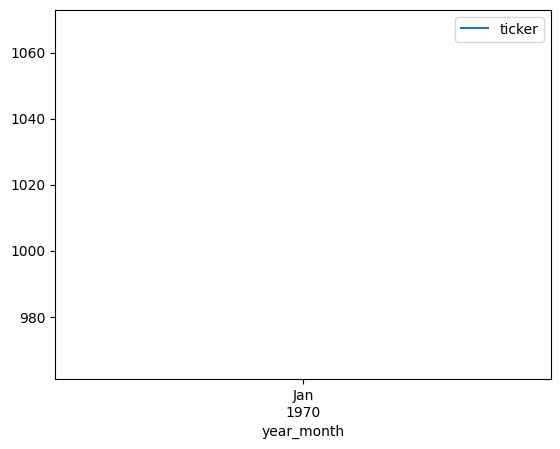

In [32]:
# Mentioning based on Month
top_ticker_mentions_by_month = df2_top_5.groupby("year_month")['ticker'].count().plot(legend = True)

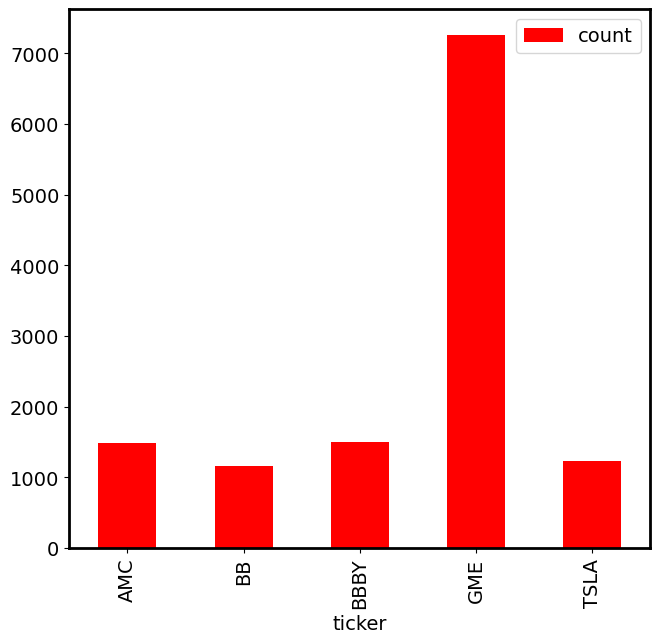

In [624]:
top_tickers_period_by_month = df2_top_5.groupby(df2_top_5["year_month"]).value_counts(ascending = True)

pd.plotting.register_matplotlib_converters()
# plotting top 5 
top_tickers_period_by_month = top_tickers_period_by_month.reset_index()
top_tickers_period_by_month.columns = ['date', 'ticker', 'count']

top_tickers_period_by_month_bar = top_tickers_period_by_month.groupby(top_tickers_period_by_month["ticker"]).sum().plot(kind = 'bar' , color = 'red')

In [683]:
total_months = top_tickers_period_by_month["date"].max() - top_tickers_period_by_month["date"].min()
top_tickers_period_by_month_pivot = top_tickers_period_by_month.pivot(index="ticker", columns= "date" , values = "count")
top_tickers_period_by_month_pivot = top_tickers_period_by_month_pivot.fillna(0)
top_tickers_period_by_month_pivot

date,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,...,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11
ticker,,,,,,,,,,,,,,,,,,,,,
AMC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,9.0,4.0,5.0,7.0,8.0,36.0,8.0,2.0,6.0
BB,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,1.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0
BBBY,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,4.0,1.0,3.0,2.0,1326.0,120.0,10.0,0.0
GME,0.0,0.0,0.0,1.0,0.0,2.0,1.0,2.0,1.0,1.0,...,14.0,153.0,48.0,48.0,33.0,69.0,109.0,40.0,28.0,8.0
TSLA,9.0,9.0,9.0,14.0,16.0,9.0,14.0,1.0,1.0,8.0,...,11.0,11.0,24.0,19.0,9.0,19.0,14.0,6.0,24.0,10.0


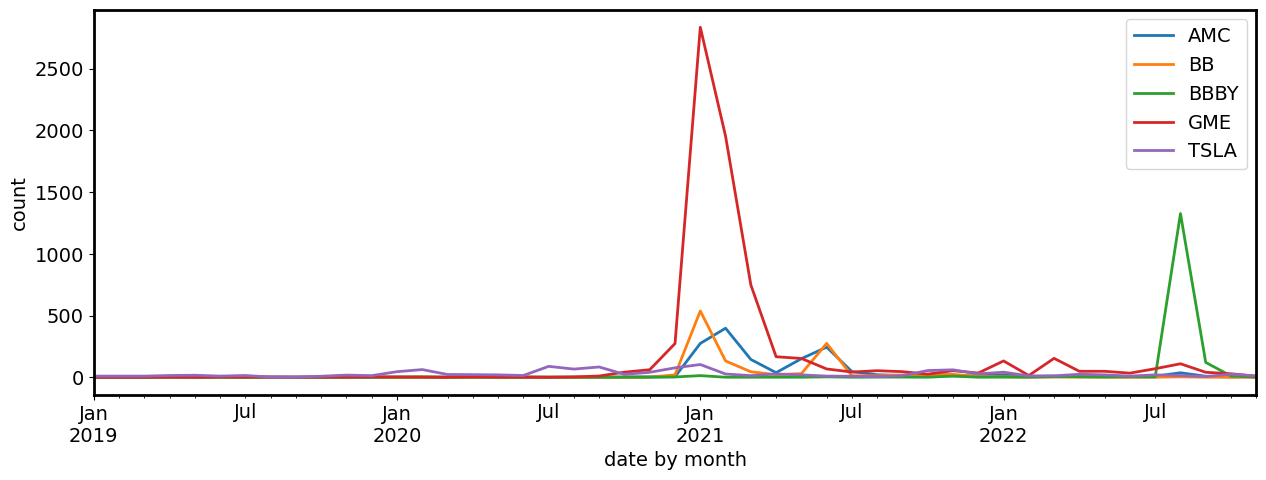

In [688]:
for i in range(len(top_5_list)):
    line = top_tickers_period_by_month_pivot.iloc[i]
    line.plot(figsize = [15,5], legend = True)
plt.xlabel("date by month")
plt.ylabel("count")
plt.show()

In [689]:
#get one for year alone
df3 = df[["Time of Creation" , "ticker"]]
df3_top_5 = df3[df3.ticker.isin(top_5_list)]
df3_top_5['year'] = pd.to_datetime(df3_top_5['Time of Creation']).dt.year
df3_top_5 = df3_top_5.drop(["Time of Creation"], axis = 1)

/var/folders/gg/j9k_n1253cn__3qb4ymvx31r0000gn/T/ipykernel_41009/1659684636.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_top_5['year'] = pd.to_datetime(df3_top_5['Time of Creation']).dt.year


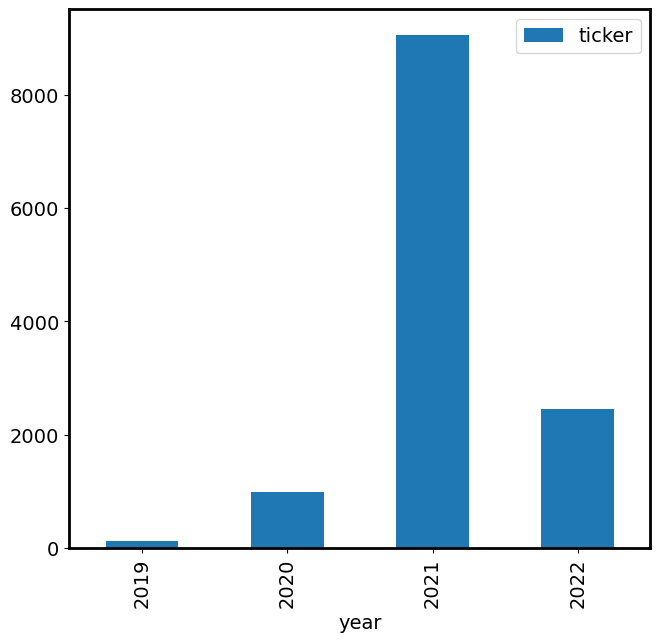

In [690]:
ticker_mentions_by_year = df3_top_5.groupby(df3_top_5["year"]).count()
ticker_mentions_by_year.plot(kind = "bar")
top_tickers_period_by_year = df3_top_5.groupby(df3_top_5["year"]).value_counts()

In [691]:
ticker_mentions_by_year = top_tickers_period_by_year.reset_index()
ticker_mentions_by_year.columns = ['date', 'ticker', 'count']

In [692]:
top_tickers_period_by_year_pivot = ticker_mentions_by_year.pivot(index="ticker", columns= "date", values = "count")
top_tickers_period_by_year_pivot = top_tickers_period_by_year_pivot.fillna(0)
top_tickers_period_by_year_pivot

date,2019,2020,2021,2022
ticker,,,,
AMC,0.0,15.0,1364.0,111.0
BB,2.0,21.0,1129.0,12.0
BBBY,2.0,5.0,27.0,1471.0
GME,12.0,394.0,6174.0,682.0
TSLA,120.0,559.0,362.0,188.0


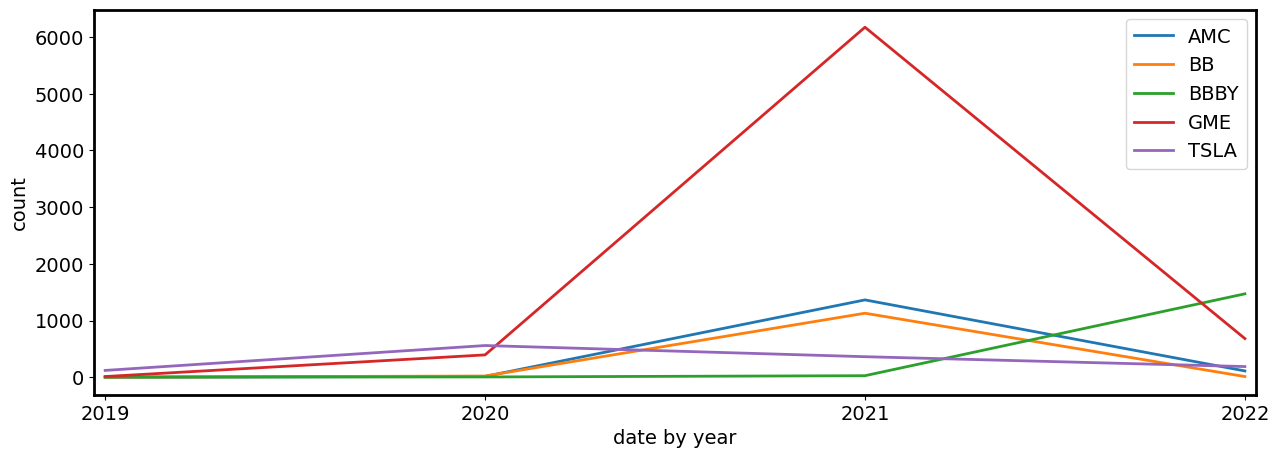

In [693]:
for i in range(len(top_5_list)):
    line = top_tickers_period_by_year_pivot.iloc[i]
    line.plot(xticks =top_tickers_period_by_year_pivot.columns,  figsize = [15,5], legend = True)
plt.xlabel("date by year")
plt.ylabel("count")
plt.show()

## Testing Models with TF-IDF

In [33]:
data_with_labels = df

In [34]:
 data_with_labels["proprocessed"] = data_with_labels["fulltext"].apply(preprocessText)

In [35]:
data_with_labels = data_with_labels[["post id","Manual Sentiment", "proprocessed"]]

In [36]:
data_with_labels

,post id,Manual Sentiment,proprocessed
0,22223,Buy,first yolo minussign jumped dollarsign clov wa...
1,3537,Buy,tesla undervalued dollarsign numberplaceholder...
2,7256,Buy,new gme bull come chat let spin yarn warning a...
3,13155,Buy,porn addict masturbated numberplaceholder day ...
4,5425,Buy,tch tmr right pltr moon numberplaceholder ment...
...,...,...,...
1394,13646,Sell,sell hold numberplaceholder percentsign alread...
1395,9552,Buy,finra data show numberplaceholder million gme ...
1396,17745,Hold,amd close following earnings report november n...
1397,9554,Hold,squeeze squoze bear ape gonne long one technic...


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,classification_report

In [38]:
sample_corpora = data_with_labels['proprocessed'].iloc[:].values
sample_corpora

array(['first yolo minussign jumped dollarsign clov wagon lfgoooooo',
       'tesla undervalued dollarsign numberplaceholder bought first tsla share ipo day amid everyone jim cramer auto industry friend making compelling counterargument make profitthey hemorrhaging money car company going make electric car eat lunch fucking stupid still share many bought along way think dollarsign share company optimistic justification numberplaceholder tesla le consistently maintained decent gross margin usually higher automotive company mostly position could consistently profitable focused existing product seen huge expansion last year outfitting growing fremont factory nevada factory buffalo shanghai well dozen small operation around area germany coming austin soon ramping design manufacturing business employee new product automotive solar stationary storage consistently increasing revenue still people say lost dollarsign numberplaceholder per share hemorrhaging money numberplaceholder electric car 

In [39]:
count_vectorizer = CountVectorizer()
wm = count_vectorizer.fit_transform(sample_corpora)

In [40]:
wm

<1399x11185 sparse matrix of type '<class 'numpy.int64'>'
	with 69444 stored elements in Compressed Sparse Row format>

In [41]:
doc_names = ['Doc{:d}'.format(idx) for idx, _ in enumerate(wm)]
feat_names = count_vectorizer.get_feature_names()

c:\Users\Calgary123\anaconda3\envs\ensf-ml\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [42]:
feat_names

['aaand',
 'aahhhh',
 'aal',
 'aapl',
 'aaron',
 'abandoning',
 'abbot',
 'abbreviation',
 'abff',
 'ability',
 'abl',
 'able',
 'abnormally',
 'aboard',
 'abroad',
 'abrupt',
 'absence',
 'absent',
 'absolute',
 'absolutely',
 'absolutley',
 'absorb',
 'abstract',
 'abstractid',
 'absurd',
 'absurdity',
 'abuse',
 'abused',
 'abusing',
 'abusive',
 'acb',
 'acccounts',
 'accel',
 'accelerate',
 'accelerated',
 'accelerates',
 'accelerating',
 'acceleration',
 'accept',
 'acceptance',
 'accepted',
 'accepting',
 'access',
 'accessible',
 'accessory',
 'accidentally',
 'accidently',
 'accomodate',
 'accompanied',
 'accomplice',
 'accomplish',
 'accomplished',
 'accord',
 'accordance',
 'according',
 'accordingly',
 'account',
 'accountability',
 'accountable',
 'accountant',
 'accounted',
 'accounting',
 'acct',
 'accumulate',
 'accumulating',
 'accumulation',
 'accurate',
 'accurately',
 'accurs',
 'accusation',
 'accused',
 'accusing',
 'accustomed',
 'achieve',
 'achieved',
 'achievi

In [43]:
sample_df = pd.DataFrame(data=wm.toarray(), index=doc_names,columns=feat_names)
sample_df

,aaand,aahhhh,aal,aapl,aaron,abandoning,abbot,abbreviation,abff,ability,...,zombie,zone,zoological,zoom,zoomed,zoomers,zooooom,zte,zuckerberg,zynga
Doc0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Doc1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Doc2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Doc3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Doc4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Doc1394,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Doc1395,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Doc1396,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Doc1397,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
# X_main, X_test , y_main, y_test = train_test_split(data_with_labels['proprocessed'].values,data_with_labels['Manual Sentiment'].values,test_size=0.15,stratify=data_with_labels['Manual Sentiment'].values)
X_train, X_test, y_train, y_test = train_test_split(data_with_labels['proprocessed'], data_with_labels['Manual Sentiment'],test_size = 0.3, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X_train,y_train,test_size = 0.3, random_state=42)
# X_val, X_test, y_val, y_test = train_test_split(X_test,y_test,test_size = 0.5, random_state=42)

print("Target distribution:\n- Train: {} \n- Validation: {} \n- Test: {}".format(len(y_train),len(y_val),len(y_test)))
print("\nData distribution:\n- Train: {} \n- Validation: {} \n- Test: {}".format(len(X_train),len(X_val),len(X_test)))

# X_train.shape
print("\nData Shapes:\n- Train: {} \n- Validation: {} \n- Test: {}".format(X_train.shape,X_val.shape,X_test.shape))
print("\nTarget Shapes:\n- Train: {} \n- Validation: {} \n- Test: {}".format(y_train.shape,y_val.shape,y_test.shape))


Target distribution:
- Train: 979 
- Validation: 210 
- Test: 420

Data distribution:
- Train: 979 
- Validation: 210 
- Test: 420

Data Shapes:
- Train: (979,) 
- Validation: (210,) 
- Test: (420,)

Target Shapes:
- Train: (979,) 
- Validation: (210,) 
- Test: (420,)


# TF-IDF

In [65]:
tfidf_vectorizer = TfidfVectorizer() 
tfidf_train_vectors = tfidf_vectorizer.fit_transform(X_train)
tfidf_validation_vectors = tfidf_vectorizer.fit_transform(X_val)
tfidf_test_vectors = tfidf_vectorizer.transform(X_test)

y_pred = classifier1.predict(tfidf_test_vectors)

In [46]:
from sklearn.model_selection import cross_validate


def get_classifier_cv_score(model, X, y, scoring='accuracy', cv=7):
    
    score = cross_validate(estimator = model , X=X , y=y , cv = cv , scoring = scoring, return_train_score = True)
    training_score = score["train_score"].mean()
    testing_score = score["test_score"].mean()
    
    return (training_score, testing_score)

#### Not Very Accurate

In [47]:
list_of_models = [RandomForestClassifier(random_state = 172), LogisticRegression(random_state = 172), GradientBoostingClassifier(random_state = 172)]
results_training = []
results_testing = []

for model in list_of_models:
    (training , validation)= get_classifier_cv_score(model, tfidf_train_vectors, y_train, scoring = "accuracy")
    (validation_value, testing) = get_classifier_cv_score(model, tfidf_validation_vectors, y_val, scoring = "accuracy")
    results_testing.append((model,validation_value, testing))
    results_training.append((model, training, validation))
results_testing.sort(key = lambda x: x[2], reverse = True)
results_training.sort(key = lambda x: x[2], reverse = True)
i = 0
j = 0
print ("Sorted by Testing score")
for result in results_testing:
    i += 1
    print ("{}.{} val_score={:.3f} testing_score={:.3f}".format(i,result[0] , result[1], result[2]))

print ("\nSorted by Training score")    
for result in results_training:
    j += 1
    print ("{}.{} train_score={:.3f} validation_score={:.3f}".format(i,result[0] , result[1], result[2]))    

Sorted by Testing score
1.LogisticRegression(random_state=172) val_score=0.866 testing_score=0.562
2.RandomForestClassifier(random_state=172) val_score=1.000 testing_score=0.557
3.GradientBoostingClassifier(random_state=172) val_score=1.000 testing_score=0.481

Sorted by Training score
3.GradientBoostingClassifier(random_state=172) train_score=0.894 validation_score=0.626
3.RandomForestClassifier(random_state=172) train_score=0.996 validation_score=0.611
3.LogisticRegression(random_state=172) train_score=0.842 validation_score=0.599


## Different method (I think More Propper)

In [84]:
tfidf_vectorizer = TfidfVectorizer() 
tfidf_train_vectors = tfidf_vectorizer.fit_transform(X_train)
tfidf_test_vectors = tfidf_vectorizer.transform(X_test)

In [83]:
print(y_test.shape)

(420,)


In [88]:
classifier1 = RandomForestClassifier(random_state = 42)
classifier1.fit(tfidf_train_vectors,y_train)
# classifier1.fit(tfidf_validation_vectors, y_val)
y_pred = classifier1.predict(tfidf_test_vectors)

print("Random Forest score: {0:.3f}".format(classifier1.score(tfidf_test_vectors,y_test)))
print("Report For Random Forest: \n" + classification_report(y_test,y_pred))

classifier2 = LogisticRegression(random_state = 42)
classifier2.fit(tfidf_train_vectors,y_train)
# classifier2.fit(tfidf_validation_vectors, y_val)
y_pred = classifier2.predict(tfidf_test_vectors)

print()
print("Logistic Regression score: {0:.3f}".format(classifier2.score(tfidf_test_vectors,y_test)))
print("Report For Logistic Regression: \n" + classification_report(y_test,y_pred))

classifier3 = GradientBoostingClassifier(random_state = 42)
classifier3.fit(tfidf_train_vectors,y_train)
# classifier3.fit(tfidf_validation_vectors, y_val)
y_pred = classifier3.predict(tfidf_test_vectors)

print()
print("Gradient Boosting Classifier score: {0:.3f}".format(classifier3.score(tfidf_test_vectors,y_test)))
print("Report For Gradient Booster: \n" + classification_report(y_test,y_pred))

from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
classifier4= BernoulliNB()
classifier4.fit(tfidf_train_vectors,y_train)
y_pred = classifier4.predict(tfidf_test_vectors)

print()
print("NB score: {0:.3f}".format(classifier4.score(tfidf_test_vectors,y_test)))
print("Report For NB: \n" + classification_report(y_test,y_pred))

classifier5= SVC()
classifier5.fit(tfidf_train_vectors,y_train)
y_pred = classifier5.predict(tfidf_test_vectors)

print()
print("SVC score: {0:.3f}".format(classifier5.score(tfidf_test_vectors,y_test)))
print("Report For SVC: \n" + classification_report(y_test,y_pred))

Random Forest score: 0.602
Report For Random Forest: 
              precision    recall  f1-score   support

         Buy       0.60      0.94      0.73       235
        Hold       0.62      0.22      0.33       143
        Sell       0.00      0.00      0.00        42

    accuracy                           0.60       420
   macro avg       0.41      0.39      0.35       420
weighted avg       0.55      0.60      0.52       420



c:\Users\Calgary123\anaconda3\envs\ensf-ml\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Calgary123\anaconda3\envs\ensf-ml\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Calgary123\anaconda3\envs\ensf-ml\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Logistic Regression score: 0.619
Report For Logistic Regression: 
              precision    recall  f1-score   support

         Buy       0.62      0.91      0.74       235
        Hold       0.61      0.32      0.42       143
        Sell       0.00      0.00      0.00        42

    accuracy                           0.62       420
   macro avg       0.41      0.41      0.39       420
weighted avg       0.55      0.62      0.56       420



c:\Users\Calgary123\anaconda3\envs\ensf-ml\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Calgary123\anaconda3\envs\ensf-ml\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Calgary123\anaconda3\envs\ensf-ml\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Gradient Boosting Classifier score: 0.617
Report For Gradient Booster: 
              precision    recall  f1-score   support

         Buy       0.63      0.88      0.74       235
        Hold       0.56      0.32      0.41       143
        Sell       0.54      0.17      0.25        42

    accuracy                           0.62       420
   macro avg       0.58      0.45      0.47       420
weighted avg       0.60      0.62      0.58       420


NB score: 0.548
Report For NV: 
              precision    recall  f1-score   support

         Buy       0.57      0.92      0.70       235
        Hold       0.57      0.09      0.16       143
        Sell       0.07      0.02      0.04        42

    accuracy                           0.55       420
   macro avg       0.40      0.34      0.30       420
weighted avg       0.52      0.55      0.45       420


SVC score: 0.574
Report For SVC: 
              precision    recall  f1-score   support

         Buy       0.58      0.96      0.7

c:\Users\Calgary123\anaconda3\envs\ensf-ml\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Calgary123\anaconda3\envs\ensf-ml\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Calgary123\anaconda3\envs\ensf-ml\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Bag-Of-Words

In [77]:
wm.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [89]:
wm.shape

(1399, 11185)

In [92]:
# X_main, X_test , y_main, y_test = train_test_split(data_with_labels['proprocessed'].values,data_with_labels['Manual Sentiment'].values,test_size=0.15,stratify=data_with_labels['Manual Sentiment'].values)
X_train, X_test, y_train, y_test = train_test_split(wm, data_with_labels['Manual Sentiment'],test_size = 0.3, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X_train,y_train,test_size = 0.3, random_state=42)
# X_val, X_test, y_val, y_test = train_test_split(X_test,y_test,test_size = 0.5, random_state=42)

# print("Target distribution:\n- Train: {}\n- Test: {}".format(len(y_train),len(y_test)))
# print("\nData distribution:\n- Train: {}\n- Test: {}".format(len(X_train),len(X_test)))

# # X_train.shape
# print("\nData Shapes:\n- Train: {} \n- Test: {}".format(X_train.shape,X_test.shape))
# print("\nTarget Shapes:\n- Train: {} \n- Test: {}".format(y_train.shape,y_test.shape))

In [96]:
X_train.shape

(979, 11185)

In [99]:
classifier1 = RandomForestClassifier(random_state = 42)
classifier1.fit(X_train,y_train)
# classifier1.fit(tfidf_validation_vectors, y_val)
y_pred = classifier1.predict(X_test)

print("Random Forest score: {0:.3f}".format(classifier1.score(X_test,y_test)))
print("Report For Random Forest: \n" + classification_report(y_test,y_pred))

classifier2 = LogisticRegression(random_state = 42)
classifier2.fit(X_train,y_train)
# classifier2.fit(tfidf_validation_vectors, y_val)
y_pred = classifier2.predict(X_test)

print()
print("Logistic Regression score: {0:.3f}".format(classifier2.score(X_test,y_test)))
print("Report For Logistic Regression: \n" + classification_report(y_test,y_pred))

classifier3 = GradientBoostingClassifier(random_state = 42)
classifier3.fit(X_train,y_train)
# classifier3.fit(tfidf_validation_vectors, y_val)
y_pred = classifier3.predict(X_test)

print()
print("Gradient Boosting Classifier score: {0:.3f}".format(classifier3.score(X_test,y_test)))
print("Report For Gradient Booster: \n" + classification_report(y_test,y_pred))



Random Forest score: 0.619
Report For Random Forest: 
              precision    recall  f1-score   support

         Buy       0.62      0.92      0.74       235
        Hold       0.63      0.31      0.41       143
        Sell       0.00      0.00      0.00        42

    accuracy                           0.62       420
   macro avg       0.42      0.41      0.38       420
weighted avg       0.56      0.62      0.55       420



c:\Users\Calgary123\anaconda3\envs\ensf-ml\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Calgary123\anaconda3\envs\ensf-ml\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Calgary123\anaconda3\envs\ensf-ml\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c


Logistic Regression score: 0.619
Report For Logistic Regression: 
              precision    recall  f1-score   support

         Buy       0.68      0.80      0.73       235
        Hold       0.54      0.45      0.49       143
        Sell       0.32      0.17      0.22        42

    accuracy                           0.62       420
   macro avg       0.51      0.47      0.48       420
weighted avg       0.59      0.62      0.60       420


Gradient Boosting Classifier score: 0.610
Report For Gradient Booster: 
              precision    recall  f1-score   support

         Buy       0.61      0.92      0.74       235
        Hold       0.66      0.27      0.38       143
        Sell       0.14      0.02      0.04        42

    accuracy                           0.61       420
   macro avg       0.47      0.40      0.38       420
weighted avg       0.58      0.61      0.54       420



In [101]:
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
classifier4= BernoulliNB()
classifier4.fit(X_train,y_train)
y_pred = classifier4.predict(X_test)

print()
print("NB score: {0:.3f}".format(classifier4.score(X_test,y_test)))
print("Report For NB: \n" + classification_report(y_test,y_pred))

classifier5= SVC()
classifier5.fit(X_train,y_train)
y_pred = classifier5.predict(X_test)

print()
print("SVC score: {0:.3f}".format(classifier5.score(X_test,y_test)))
print("Report For SVC: \n" + classification_report(y_test,y_pred))


NB score: 0.538
Report For NB: 
              precision    recall  f1-score   support

         Buy       0.56      0.89      0.69       235
        Hold       0.58      0.10      0.18       143
        Sell       0.05      0.02      0.03        42

    accuracy                           0.54       420
   macro avg       0.40      0.34      0.30       420
weighted avg       0.52      0.54      0.45       420


SVC score: 0.562
Report For SVC: 
              precision    recall  f1-score   support

         Buy       0.56      1.00      0.72       235
        Hold       1.00      0.01      0.01       143
        Sell       0.00      0.00      0.00        42

    accuracy                           0.56       420
   macro avg       0.52      0.34      0.24       420
weighted avg       0.65      0.56      0.41       420



c:\Users\Calgary123\anaconda3\envs\ensf-ml\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Calgary123\anaconda3\envs\ensf-ml\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Calgary123\anaconda3\envs\ensf-ml\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**N-grams**

In [109]:
bigram_vectorizer = CountVectorizer(ngram_range=(2,2), token_pattern=r'\b\w+\b', min_df=1)
bg = bigram_vectorizer.fit_transform(sample_corpora)

In [113]:
bg_features = bigram_vectorizer.get_feature_names()
bg_features

['aaand way',
 'aahhhh hug',
 'aal iimgurcomtgckywjpng',
 'aapl aapl',
 'aapl bb',
 'aapl call',
 'aapl coming',
 'aapl dollarsign',
 'aapl minussign',
 'aapl monday',
 'aapl nflx',
 'aapl plussign',
 'aapl rectangle',
 'aapl rkt',
 'aapl short',
 'aapl single',
 'aapl tsla',
 'aapl update',
 'aapl xrt',
 'aaron announces',
 'aaron assuming',
 'aaron pounce',
 'aaron try',
 'abandoning fellow',
 'abbot dollarsign',
 'abbreviation log',
 'abff minussign',
 'ability actually',
 'ability buy',
 'ability conversion',
 'ability determine',
 'ability diamond',
 'ability dream',
 'ability efficiently',
 'ability focus',
 'ability hedge',
 'ability hope',
 'ability issue',
 'ability keep',
 'ability make',
 'ability might',
 'ability pay',
 'ability print',
 'ability referring',
 'ability significantly',
 'ability stock',
 'ability successfully',
 'ability switch',
 'abl facility',
 'able accomplish',
 'able achieve',
 'able add',
 'able afford',
 'able beat',
 'able benefit',
 'able borrow',


In [115]:
bg.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [116]:
X_train, X_test, y_train, y_test = train_test_split(bg, data_with_labels['Manual Sentiment'],test_size = 0.3, random_state=42)

In [117]:
X_train.shape

(979, 78001)

In [118]:
classifier1 = RandomForestClassifier(random_state = 42)
classifier1.fit(X_train,y_train)
# classifier1.fit(tfidf_validation_vectors, y_val)
y_pred = classifier1.predict(X_test)

print("Random Forest score: {0:.3f}".format(classifier1.score(X_test,y_test)))
print("Report For Random Forest: \n" + classification_report(y_test,y_pred))

classifier2 = LogisticRegression(random_state = 42)
classifier2.fit(X_train,y_train)
# classifier2.fit(tfidf_validation_vectors, y_val)
y_pred = classifier2.predict(X_test)

print()
print("Logistic Regression score: {0:.3f}".format(classifier2.score(X_test,y_test)))
print("Report For Logistic Regression: \n" + classification_report(y_test,y_pred))

classifier3 = GradientBoostingClassifier(random_state = 42)
classifier3.fit(X_train,y_train)
# classifier3.fit(tfidf_validation_vectors, y_val)
y_pred = classifier3.predict(X_test)

print()
print("Gradient Boosting Classifier score: {0:.3f}".format(classifier3.score(X_test,y_test)))
print("Report For Gradient Booster: \n" + classification_report(y_test,y_pred))

Random Forest score: 0.562
Report For Random Forest: 
              precision    recall  f1-score   support

         Buy       0.57      0.97      0.72       235
        Hold       0.44      0.06      0.10       143
        Sell       0.00      0.00      0.00        42

    accuracy                           0.56       420
   macro avg       0.34      0.34      0.27       420
weighted avg       0.47      0.56      0.43       420



c:\Users\Calgary123\anaconda3\envs\ensf-ml\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Calgary123\anaconda3\envs\ensf-ml\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Calgary123\anaconda3\envs\ensf-ml\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Logistic Regression score: 0.576
Report For Logistic Regression: 
              precision    recall  f1-score   support

         Buy       0.58      0.93      0.72       235
        Hold       0.50      0.16      0.24       143
        Sell       1.00      0.02      0.05        42

    accuracy                           0.58       420
   macro avg       0.69      0.37      0.34       420
weighted avg       0.60      0.58      0.49       420


Gradient Boosting Classifier score: 0.571
Report For Gradient Booster: 
              precision    recall  f1-score   support

         Buy       0.58      0.96      0.72       235
        Hold       0.58      0.10      0.17       143
        Sell       0.00      0.00      0.00        42

    accuracy                           0.57       420
   macro avg       0.39      0.35      0.30       420
weighted avg       0.52      0.57      0.46       420

